1. Import required libraries and read the dataset.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('Apps_data+(1).csv')

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
#first five samples of the dataset
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#shape of the dataset(rows,columns)
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [8]:
#summary statistics of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
#summary statistics of the categorical columns
df.describe(include='object')


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


4. Check if there are any duplicate records in the dataset? if any drop them.


In [9]:
#checking for the duplicate records in the dataset
dupes=df.duplicated()
dupes.sum()

483

In [10]:
#dropping the duplicates
df=df.drop_duplicates()
df.duplicated().sum()


0

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [11]:
#checking for unique values in the column "Category"
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [12]:
#checking if there are any null values in the "Rating" column.
df['Rating'].isnull().sum()

1465

In [13]:
#dropping the rows, which consists of null values
df = df.dropna(subset=['Rating'])
#checking for null values after dropping them.
df['Rating'].isnull().sum()

0

In [14]:
#creating a new column as "Rating_category".
#using Lambda Function 
df['Rating_category']=df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')
df["Rating_category"]

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8893, dtype: object

7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


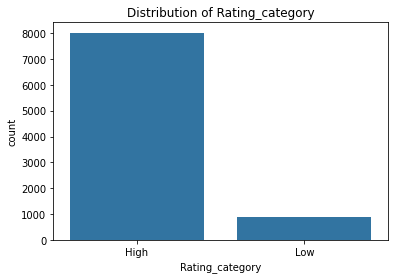

In [15]:
#using seaborn library to countplot the distribution
sns.countplot(x='Rating_category', data=df)
plt.title('Distribution of Rating_category')
plt.show()

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [16]:
#Converting the "reviews" column's datatype to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
#checking the missing values and dropping them.
df=df.dropna(subset=['Reviews'])
df['Reviews'].isnull().sum()

0

In [17]:
#check for the outliers
Q1=df['Reviews'].quantile(0.25)
Q2=df['Reviews'].quantile(0.5)
Q3=df['Reviews'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [18]:
outliers=(df['Reviews']<lower_bound) | (df['Reviews']>upper_bound)
df.loc[outliers,'Reviews']

3        215644.0
18       194216.0
19       224399.0
42       295221.0
72       271920.0
           ...   
10740    316378.0
10781    834117.0
10784    245455.0
10809    376223.0
10840    398307.0
Name: Reviews, Length: 1555, dtype: float64

In [20]:
df.loc[outliers, 'Reviews'] = np.log1p(df.loc[outliers, 'Reviews'])
df.loc[outliers, 'Reviews']

3        2.586364
18       2.578452
19       2.589356
42       2.609738
72       2.603672
           ...   
10740    2.614816
10781    2.683356
10784    2.596066
10809    2.627414
10840    2.631528
Name: Reviews, Length: 1555, dtype: float64

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [21]:
df['Size'] = df['Size'].replace({'M': '000000', 'K': '000','k':'000'}, regex=True)

# Convert 'Size' column to numeric, treating non-numeric values as NaN
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Drop entries where 'Size' is 'Varies with device'
df = df[df['Size'] != 'Varies with device']

# Convert the 'Size' column to suitable data type (float)
df['Size'] = df['Size'].astype(float)


10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [23]:
df['Installs']=df['Installs'].str.replace(',', '').str.rstrip('+').astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8892, dtype: int32

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [22]:
df['Price']=df['Price'].str.replace('$','').astype(float)
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [24]:
columns_to_drop=['App','Rating','Genres','Last Updated','Current Ver','Android Ver']
df.drop(columns=columns_to_drop,inplace=True)

In [25]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159.000000,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,967.000000,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,87510.000000,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,2.586364,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,967.000000,2.8,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10834,FAMILY,7.000000,2.6,500,Free,0.0,Everyone,High
10836,FAMILY,38.000000,53000000.0,5000,Free,0.0,Everyone,High
10837,FAMILY,4.000000,3.6,100,Free,0.0,Everyone,High
10839,BOOKS_AND_REFERENCE,114.000000,NaN,1000,Free,0.0,Mature 17+,High


13. Encode the categorical columns.


In [26]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
categorical_columns=['Category','Type','Content Rating','Rating_category']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
    #df['categorical_columns']=df[categorical_columns].apply(lambda col:encoder.fit_transform(col))
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,159.000000,19000000.0,10000,0,0.0,1,0
1,0,967.000000,14000000.0,500000,0,0.0,1,0
2,0,87510.000000,8.7,5000000,0,0.0,1,0
3,0,2.586364,25000000.0,50000000,0,0.0,4,0
4,0,967.000000,2.8,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10834,11,7.000000,2.6,500,0,0.0,1,0
10836,11,38.000000,53000000.0,5000,0,0.0,1,0
10837,11,4.000000,3.6,100,0,0.0,1,0
10839,3,114.000000,NaN,1000,0,0.0,3,0


14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [27]:
target_variable = df['Rating_category']

# Segregate the independent features
independent_features = df.drop(columns=['Rating_category'])


15. Split the dataset into train and test.


In [29]:
from sklearn.model_selection import train_test_split

# Assuming you have 'target_variable' and 'independent_features' from the previous step

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(independent_features, target_variable)


16. Standardize the data, so that the values are within a particular range.


In [32]:
from sklearn.preprocessing import StandardScaler

# Assuming you have 'X_train' and 'X_test' from the previous step

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [33]:
columns = X_train.columns  # Assuming X_train is a DataFrame
X_train_df = pd.DataFrame(X_train_standardized, columns=columns)
X_test_df = pd.DataFrame(X_test_standardized, columns=columns)